# Build an Image Classifier from CIFAR-10

In [2]:
from matplotlib import pyplot as plt
import numpy as np

## Load the Data
The CIFAR images are stored on this machine in `/datasets/CIFAR/10/cifar-10-batches-py`. There are 5 batches plus a test batch. We should really load them all, but for demonstration purposes, and to speed up learning, we just use the first one. The `batches.meta` file holds meta data about the image data. We want the label names from it. Pickle is a way for Python to serialise data for file storage.

In [24]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_folder = '/datasets/CIFAR/10/'

batch1 = unpickle(data_folder+'cifar-10-batches-py/data_batch_1')
meta_data_dict = unpickle(data_folder+'cifar-10-batches-py/batches.meta')
print(meta_data_dict)
labels = meta_data_dict[b'label_names']

{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


`batch1` is a dictionary. Here we list the keys

In [25]:
for i in batch1:
    print(i)

b'batch_label'
b'labels'
b'data'
b'filenames'


## Extract the training images
Now we extract the images data into a numpy array of 10,000 32x32x3 image arrays

In [26]:
def generate_data_for_cnn(batch):
    images = batch[b'data']
    images = images.reshape((len(images), 3, 32, 32))
    return np.rollaxis(images, 1, 4)
    
images1 = generate_data_for_cnn(batch1)
print("Training data shape is",images1.shape)

Training data shape is (10000, 32, 32, 3)


## View an example image
Change the value of `image_ix` from between 0 to 9999 to see different images and their class labels.

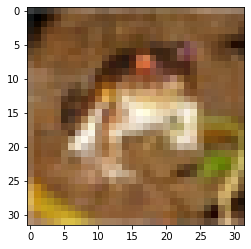

frog


In [27]:
image_ix = 0
plt.imshow(images1[image_ix])
plt.show()
label_ix = batch1[b'labels'][image_ix]
print(labels[label_ix].decode("utf-8"))

## Setup Tensorflow and the training data

In [16]:
# Limit memory usage for GPU
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import numpy as np

from sklearn.preprocessing import LabelEncoder

x = images1.astype('float32')
y = batch1[b'labels']
y = LabelEncoder().fit_transform(y)

## Choose a GPU from 0 to 3 and define the convolutional neural network
Then we run the training for 10 epochs. Change that to see how the error continues to change.

In [17]:


with tf.device('/GPU:3'):
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    # fit the model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    history = model.fit(x, y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 2.6919 - accuracy: 0.2554
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 1.7468 - accuracy: 0.3543
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5946 - accuracy: 0.4142
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4967 - accuracy: 0.4555
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 1.3954 - accuracy: 0.4885
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 1.3174 - accuracy: 0.5194
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 1.2213 - accuracy: 0.5579
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 1.1671 - accuracy: 0.5783
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 1.1084 - accuracy: 0.5971
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.0179 - accuracy: 0.6367

# Plot the training accuracy over all epochs

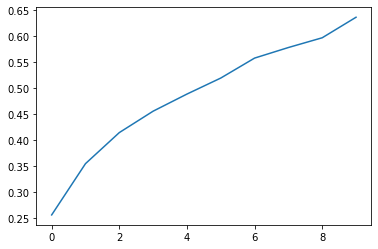

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.show()

# Test the model on the test data

In [38]:
test = unpickle(data_folder+'cifar-10-batches-py/test_batch')
test_imgs = generate_data_for_cnn(test)
x_test = test_imgs.astype('float32')
y_test = test[b'labels']



Set `test_ix` to different values to test different images

Prediction is ship


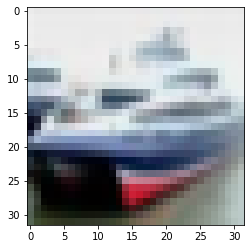

Label is ship


In [42]:
test_ix = 1
with tf.device('/GPU:3'):
    class_scores = model.predict(x_test[test_ix:test_ix+1])
best = np.argmax(class_scores)
print("Prediction is", labels[best].decode("utf-8"))

plt.imshow(test_imgs[test_ix])
plt.show()
label_ix = y_test[test_ix]
print("Label is", labels[label_ix].decode("utf-8"))